# DataCamp Certification Case Study

### Project Brief

You have been hired by Inn the Neighborhood, an online platform that allows people to rent out their properties for short stays. Currently, the webpage for renters has a conversion rate of 2%. This means that most people leave the platform without signing up. 

The product manager would like to increase this conversion rate. They are interested in developing an application to help people estimate the money they could earn renting out their living space. They hope that this would make people more likely to sign up.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the product manager in a 10 minute presentation. The product manager has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

## Getting Started

First of all, I will start by importing important packages for data wrangling (i.e. pandas & numpy) and the rental dataset

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np

Now I will import the dataset and take a look at its header and info

In [ ]:
# Import dataset
rental_df = pd.read_csv('data/rentals.csv',index_col=0)

# display df header
display(rental_df.head())

# Show dataset info
print(rental_df.info())

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8111 entries, 958 to 39354181
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8111 non-null   float64
 1   longitude       8111 non-null   float64
 2   property_type   8111 non-null   object 
 3   room_type       8111 non-null   object 
 4   bathrooms       8099 non-null   float64
 5   bedrooms        8107 non-null   float64
 6   minimum_nights  8111 non-null   int64  
 7   price           8111 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 570.3+ KB
None


As you can see, there are some columns with null values and incorrect datatype. Now I can proceed to data cleaning process

## Data Cleaning

First, let's focus on duplicates and null values.

I will start off with working duplicated rows  

In [ ]:
# Show no. of duplicated rows before drop

print('No. of duplicated rows: '+str(rental_df.duplicated().sum()))

No. of duplicated rows: 1


There's one duplicated rows, so simply drop it

In [ ]:
# Drop duplicated rows
rental_df.drop_duplicates(inplace=True)

print('No. of duplicated rows: '+str(rental_df.duplicated().sum()))

No. of duplicated rows: 0


Next, let's explore the rows with missing values. We previously saw that there are missing values in 'bathrooms' and 'bedrooms' columns.

So, let's focus on those columns.

In [ ]:
# Show rows with missing bedrooms values
display(rental_df[rental_df['bedrooms'].isnull()])

# Show rows with missing bathrooms values
display(rental_df[rental_df['bathrooms'].isnull()])

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
431862,37.78321,-122.41969,Apartment,Entire home/apt,1.0,NaN,30,$124.00
32183178,37.78883,-122.48640,House,Entire home/apt,3.5,NaN,30,$650.00
38329898,37.78347,-122.41669,Apartment,Entire home/apt,1.0,NaN,30,$75.00
38550933,37.78979,-122.41994,Apartment,Entire home/apt,1.0,NaN,30,$108.00


,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
144978,37.79336,-122.42506,Apartment,Private room,NaN,1.0,30,$56.00
229240,37.79341,-122.40340,Hostel,Shared room,NaN,1.0,1,$45.00
259621,37.79470,-122.40374,Hostel,Shared room,NaN,1.0,1,$45.00
259622,37.79441,-122.40473,Hostel,Shared room,NaN,1.0,1,$45.00
430692,37.75906,-122.40761,Apartment,Private room,NaN,1.0,31,$68.00
596042,37.79384,-122.42436,Apartment,Private room,NaN,1.0,30,$63.00
785901,37.79313,-122.40443,Hostel,Shared room,NaN,1.0,1,$45.00
786492,37.79421,-122.40310,Hostel,Shared room,NaN,1.0,1,$45.00
786506,37.79260,-122.40339,Hostel,Shared room,NaN,1.0,1,$45.00


From the table displayed, we can see rows with missing 'bedrooms' all has 'Entire home/apt' room type. Thus, I will fill missing value with mean of bedrooms of Entire home/apt

In [ ]:
avg_bedrooms = rental_df['bedrooms'][rental_df['room_type']=='Entire home/apt'].mean()

# Fill missing bedrooms
rental_df['bedrooms'].fillna(round(avg_bedrooms),inplace=True)

For bathrooms, logically thinking, if it's apartment, it should have at least 1 bathroom. If it's shared room, it might have none.

Thus, I will fill missing values following said logic.

In [ ]:
rental_df['bathrooms'][(rental_df['property_type']=='Hostel') & rental_df['bathrooms'].isna()] = rental_df['bathrooms'][(rental_df['property_type']=='Hostel') & rental_df['bathrooms'].isna()].fillna(0)

rental_df['bathrooms'][(rental_df['property_type']=='Apartment') & rental_df['bathrooms'].isna()] = rental_df['bathrooms'][(rental_df['property_type']=='Apartment') & rental_df['bathrooms'].isna()].fillna(1)

# Print df info
print(rental_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8110 entries, 958 to 39354181
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8110 non-null   float64
 1   longitude       8110 non-null   float64
 2   property_type   8110 non-null   object 
 3   room_type       8110 non-null   object 
 4   bathrooms       8110 non-null   float64
 5   bedrooms        8110 non-null   float64
 6   minimum_nights  8110 non-null   int64  
 7   price           8110 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 828.3+ KB
None


There are no more missing values now.

Next, I will move one to correcting the data types. I will start with bedrooms and bathrooms we just filled.

Let's try to convert them to integers.

In [ ]:
rental_df['bathrooms'] = rental_df['bathrooms'].astype('int64')
rental_df['bedrooms'] = rental_df['bedrooms'].astype('int64')

print(rental_df.dtypes)

latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms           int64
bedrooms            int64
minimum_nights      int64
price              object
dtype: object


In [ ]:
# See unique values in bedrooms
print(rental_df['bedrooms'].unique())

# Change 0 bedrooms to 1
rental_df['bedrooms'][rental_df['bedrooms'] == 0] = 1

[ 1  2  0  3  4  5  6 14  7  8]


Now let's move on to 'price' column. Currently, the datatype is 'object' because it contains '$' in front of numbers, and it might contain comma as well.

So, I will strip the symbols out and convert to float.

In [ ]:
# Strip dollar sign and convert to float
rental_df['price'] = rental_df['price'].str.replace(',','')
rental_df['price'] = rental_df['price'].str.replace('$','').astype('float64')

print(rental_df.dtypes)

latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms           int64
bedrooms            int64
minimum_nights      int64
price             float64
dtype: object


And we are done!

We can now move on to EDA process.

## Exploratory Data Analysis

Let's start of with visualizing categorical data, but first I have to import packages for data visualization.

In [ ]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

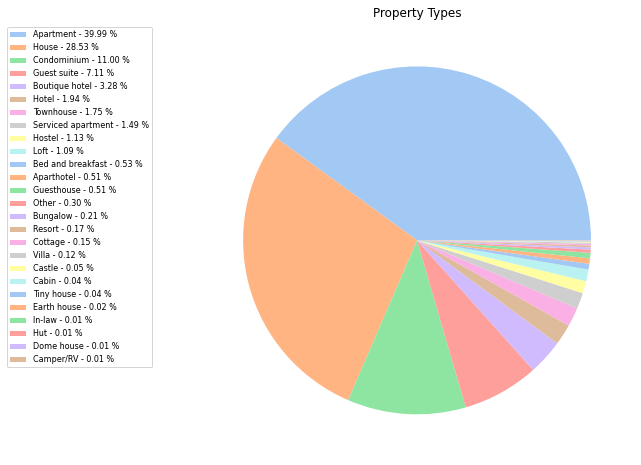

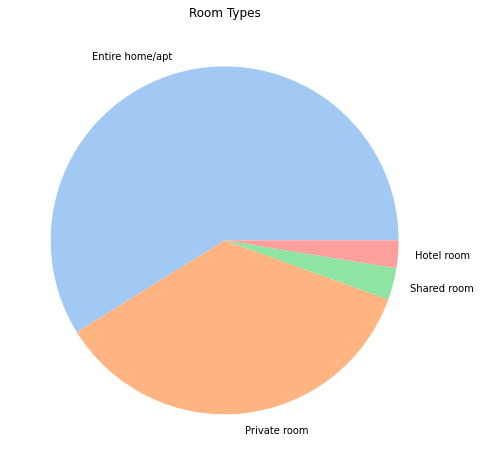

In [ ]:
# Visualize property type and room type

property_types = rental_df['property_type'].value_counts()
room_types = rental_df['room_type'].value_counts()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.rcParams["figure.figsize"] = (8,8)
property_types = rental_df['property_type'].value_counts()

x = property_types.index
y = property_types
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title('Property Types')
plt.show()

plt.pie(room_types, labels = room_types.index, colors = colors)
plt.title('Room Types')
plt.show()

From the pie chart, there's no problem with the Room Types, but for Property Types, there's a lot of type with a very small portion that we can't even see what they are!

Let's see what those types are and the percentage.

In [ ]:
property_df = pd.DataFrame({'count':property_types})
property_df['percent'] = round(property_df['count']/property_df['count'].sum()*100,2)
print(property_df)

                    count  percent
Apartment            3243    39.99
House                2314    28.53
Condominium           892    11.00
Guest suite           577     7.11
Boutique hotel        266     3.28
Hotel                 157     1.94
Townhouse             142     1.75
Serviced apartment    121     1.49
Hostel                 92     1.13
Loft                   88     1.09
Bed and breakfast      43     0.53
Aparthotel             41     0.51
Guesthouse             41     0.51
Other                  24     0.30
Bungalow               17     0.21
Resort                 14     0.17
Cottage                12     0.15
Villa                  10     0.12
Castle                  4     0.05
Cabin                   3     0.04
Tiny house              3     0.04
Earth house             2     0.02
In-law                  1     0.01
Hut                     1     0.01
Dome house              1     0.01
Camper/RV               1     0.01


There are many property types that are 1% or less. In order for our model to perform better, I remove all property types with 1% or less.

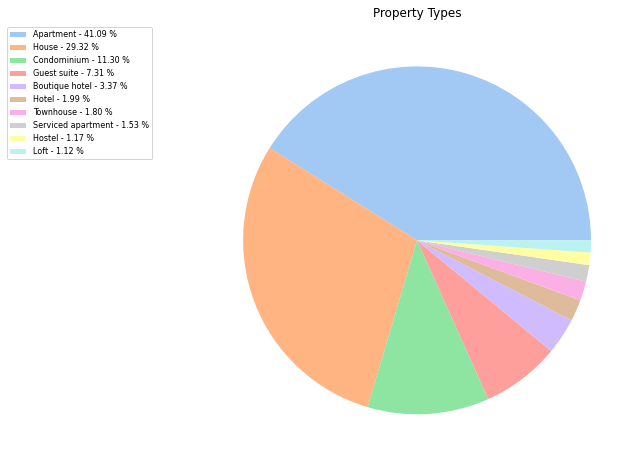

In [ ]:
# Create a mask for only categories that occur 1% or less
mask = property_df[property_df['percent'] <=1].index

# Remove property types
rental_df= rental_df[~rental_df['property_type'].isin(mask)]

# Show pie chart of property types
property_types = rental_df['property_type'].value_counts()

x = property_types.index
y = property_types
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title('Property Types')
plt.show()

Next, let's see the data description

In [ ]:
rental_df.describe()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,7892.000000,7892.000000,7892.000000,7892.000000,7.892000e+03,7892.000000
mean,37.765928,-122.430254,1.311328,1.459072,1.268755e+04,226.021921
std,0.022885,0.026998,0.774389,0.821534,1.125658e+06,415.930153
min,37.704630,-122.513060,0.000000,1.000000,1.000000e+00,0.000000
25%,37.751430,-122.442935,1.000000,1.000000,2.000000e+00,100.000000
50%,37.769035,-122.424800,1.000000,1.000000,4.000000e+00,151.000000
75%,37.785373,-122.410660,1.000000,2.000000,3.000000e+01,240.000000
max,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000


The max value of 'minimum nights' is so high! Must be outliers, so let's get rid of that.

In [ ]:
rental_df = rental_df[rental_df['minimum_nights']< 365]

rental_df.describe()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,7880.000000,7880.000000,7880.000000,7880.000000,7880.000000,7880.000000
mean,37.765924,-122.430271,1.311168,1.458883,15.830203,224.008756
std,0.022892,0.026997,0.774729,0.821611,19.049654,397.975327
min,37.704630,-122.513060,0.000000,1.000000,1.000000,0.000000
25%,37.751430,-122.442935,1.000000,1.000000,2.000000,100.000000
50%,37.769045,-122.424800,1.000000,1.000000,4.000000,151.000000
75%,37.785362,-122.410660,1.000000,2.000000,30.000000,240.000000
max,37.828790,-122.368570,14.000000,14.000000,360.000000,10000.000000


That looks much better. Although, our project scope is on places with 'short stays'. I will have to definitely remove some of the data.

Let's say short stays means less than a month, so I will remove places that has minimum nights longer than that.

Then let's take a look at the distribution.

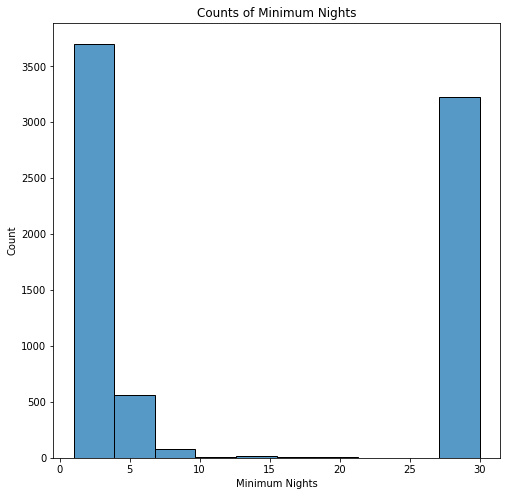

In [ ]:
rental_df = rental_df[rental_df['minimum_nights'] <= 30]

sns.histplot(rental_df['minimum_nights'],bins=10)
plt.xlabel('Minimum Nights')
plt.title('Counts of Minimum Nights')
plt.show()

Seems like people like to rent out less than 5 nights or 30 nights

Next, I will explore the relationship and distribution of numerical variables.

For this I will be using pairplot to see which relationship is worth focusing.

In [ ]:
# Import pearson correlation
from scipy.stats import pearsonr

In [ ]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

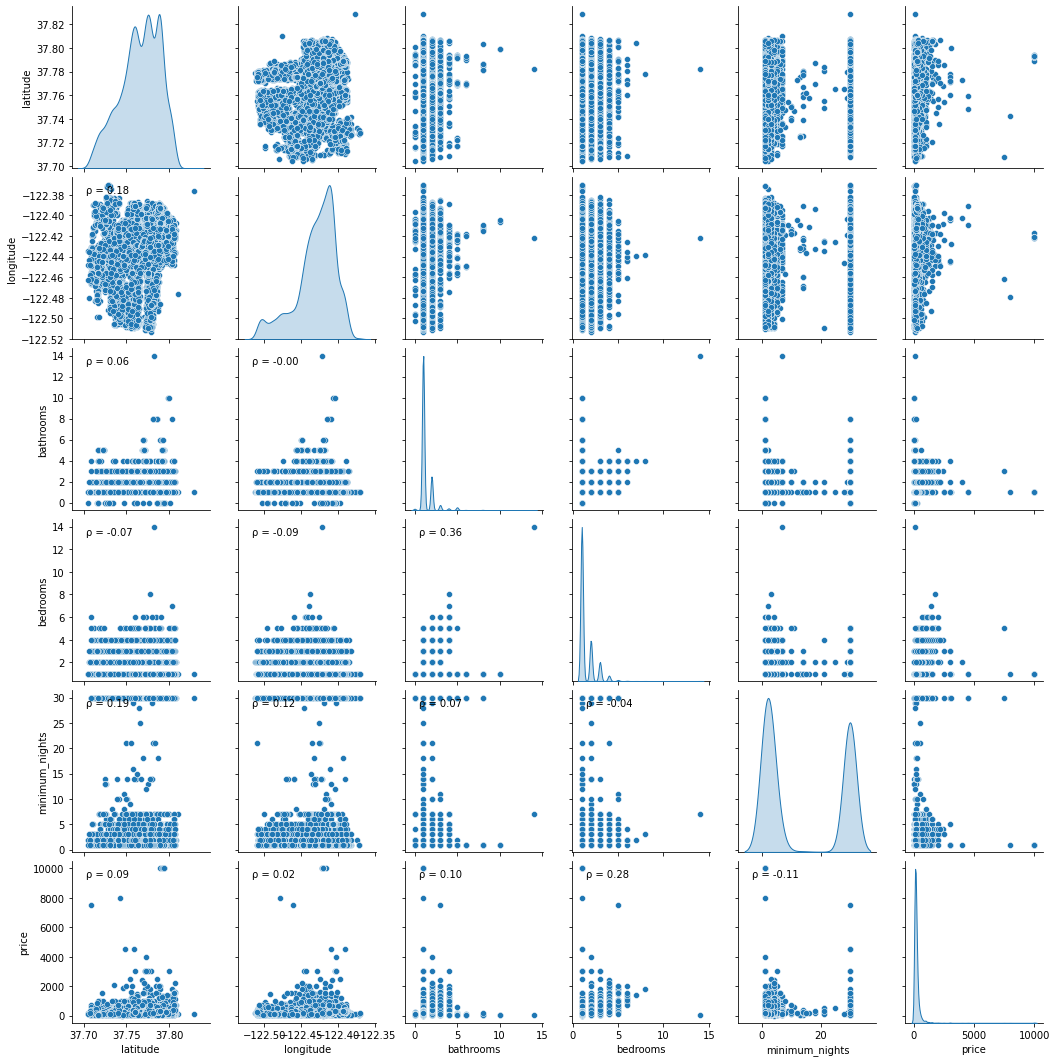

In [ ]:
# Create pairplot
plt.rcParams["figure.figsize"] = (5,5)
g = sns.pairplot(rental_df,diag_kind='kde')
g.map_lower(corrfunc)

plt.show()

As you can see from the pairplot, features that seems to be correlate are price vs bedrooms and bedrooms vs bathrooms, but bedrooms vs bathrooms doesn't benefit in our prediction.

Moreover, there's a outliers in many features, so I will have to remove them.

I will remove price outside iqr, so that our model will be more accurate. 

In [ ]:
# Find iqr of price 
def remove_iqr(col):
    '''This function removes value outside of iqr of column'''
    q75 = rental_df[col].quantile(0.75)
    q25 = rental_df[col].quantile(0.25)
    df = rental_df[(rental_df[col] < q75) & (rental_df[col] > q25)]
    return df

rental_df = remove_iqr('price')

Now, once I removed outliers from the data, let's have a quick look at pairplot again to see if correlation changes 

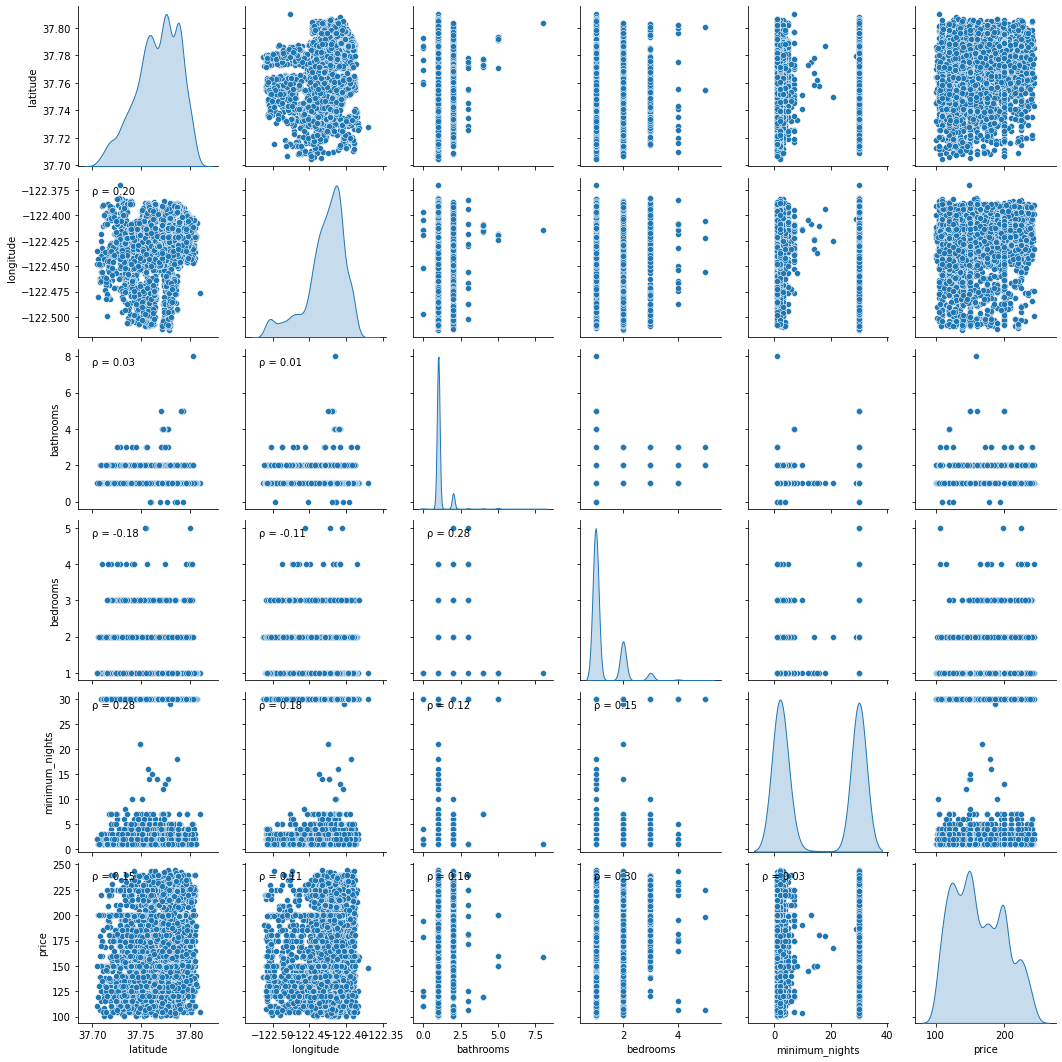

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
g = sns.pairplot(rental_df,diag_kind='kde')
g.map_lower(corrfunc)

plt.show()

Let's have a closer look at price vs bedrooms

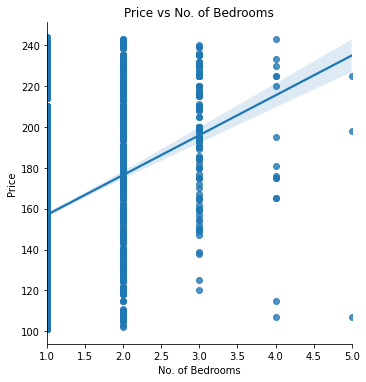

Pearson correlation coef: 0.30


In [ ]:
# Plot price vs bedrooms

sns.lmplot(x='bedrooms', y='price',data=rental_df)
plt.xlabel("No. of Bedrooms")
plt.ylabel("Price")
plt.title("Price vs No. of Bedrooms")
plt.show()

print('Pearson correlation coef: {:.2f}'.format(pearsonr(rental_df['bedrooms'], rental_df['price'])[0]))

The price and bedrooms has correlation coefficient of 0.3, the most among other features. This can be imply that the more the bedrooms in your place, the higher the rent price.

Next, let's take a look at relationship of price and categorical variables.

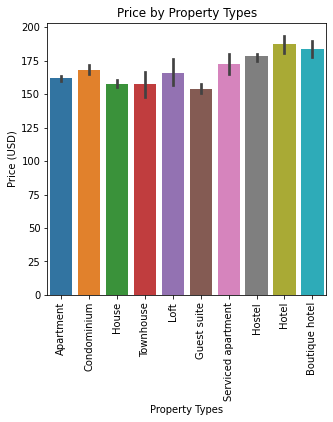

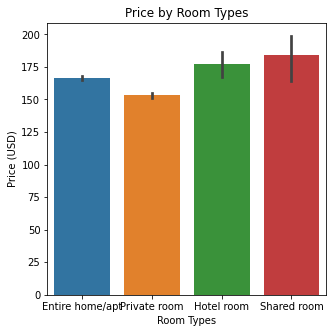

In [ ]:
# Plot price vs property type
sns.barplot(data=rental_df,x='property_type',y='price')
plt.title('Price by Property Types')
plt.xlabel('Property Types')
plt.xticks(rotation=90)
plt.ylabel('Price (USD)')
plt.show()

# Plot price vs room types
sns.barplot(data=rental_df,x='room_type',y='price')
plt.title('Price by Room Types')
plt.xlabel('Room Types')
plt.ylabel('Price (USD)')
plt.show()

From the visualiztion, we can see that price varies by various property types and rooms types. 

You tend to get higher price if you own a shared room, follow by a hotel room.

Thus, these two features might be important to our ML model

As I finished with EDA, let's move on to creating a model

## ML Modeling

According to the problem, clients want to create and app that can predict price of rentals. This is clearly a regression problem, thus I will train using regression models

I will try to run the data on several algorithms, then choose the one with the best result. Then, conduct hyperparameter tuning focusing on the best model. The algorithms I'll use for this project are __Ridge, DecisionTree, RandomForest, GradientBoosting__

Before fitting the model, let's preprocess data by scaling and apply OH encoder first

In [ ]:
# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Apply OH encoder to categorical features
sample = pd.get_dummies(rental_df,columns=['property_type','room_type'],prefix=['property_is','room_is'])

# Apply StandardScaler
sc = StandardScaler()
sc.fit(rental_df[['latitude','longitude','bedrooms','bathrooms','minimum_nights']])
sample[['latitude','longitude','bedrooms','bathrooms','minimum_nights']] = sc.transform(rental_df[['latitude','longitude','bedrooms','bathrooms','minimum_nights']])

Now it's time to fit model!

I'll first split sample into train and test set, then fit to model and evaluate

In [ ]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

y = sample[['price']]
X = sample.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# Write function to fit and evaluate and append

def fit_evaluate_append(model):
        
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    y_pred = model.predict(X_test)
    model_mae = mean_absolute_error(y_test, y_pred)
    
    initial_mae.append(round(model_mae,4))
       
    return initial_mae

# Evaluate all model
initial_mae = []

ridge = Ridge()
fit_evaluate_append(ridge)

dt = DecisionTreeRegressor()
fit_evaluate_append(dt)

rf = RandomForestRegressor()
fit_evaluate_append(rf)

gbr = GradientBoostingRegressor()
fit_evaluate_append(gbr)

svm = SVR(C = 1000, gamma=0.1)
fit_evaluate_append(svm)

base_score = pd.DataFrame({'Algorithm':['Ridge','DecisionTree','RandomForest','GradientBoosting','SVM'],'MAE':initial_mae})

display(base_score)

,Algorithm,MAE
0,Ridge,26.5446
1,DecisionTree,31.8621
2,RandomForest,24.5831
3,GradientBoosting,25.1940
4,SVM,25.9565


From the table, we can see that RandomForest has the least error and has already reach our target. 

Despite that, I will try to fine-tune this model to further improve the accuracy.

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Import grid search CV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define parameters
params = {'n_estimators': [800,1000,1200], 'max_features': ['auto', 'sqrt','log2'], 'min_samples_split': [3,5,7,9,11], 'min_samples_leaf': [1, 2, 4]}

grid = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=4,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=1)

grid.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


In [ ]:
# Print Best Score and Best Parameters
print('Grid Search Best Score: {:.2f}'.format(-1*grid.best_score_))
print('Best Parameters: {}'.format(grid.best_params_))

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Print best MAE
print('Best Model MAE: {:.2f}'.format(mean_absolute_error(y_test,y_pred)))

Our final model MAE is 24.62 which is within the target

Now I will find out the importance of each feature

In [ ]:
# Create Series of feature importances
importances_best = pd.Series(best_model.feature_importances_,index=X.columns)

# Sort Importances
sorted_importances = importances_best.sort_values()

# Plot
sorted_importances.plot(kind='barh',figsize=(10,10),color = 'g')
plt.ylabel('Features')
plt.xlabel('Importances')
plt.title('Featrure Importances')
plt.show()

As suspected in the EDA, one of the important features is bedrooms. 

Surprisingly, two most important features are longitude and latitude, in other words, it's the location! 

## Conclusion

Here are the conclusions from our model

- The most important features is the location
- Places with more bedrooms is likely to have higher rental price
- Most popular minimum rental nights is less than 5 nights and around 30 nights

## Recommendation
- Reduce number of property types / group some similar types together - reduce chance of minor categories
- Explore more on impact of location by creating a visual on rental price and location on a real map
- Remove overpriced places from the analysis
- Further tuning of the model